In [42]:
import numpy as np
import pandas as pd

In [43]:
import os
import kagglehub
uciml_breast_cancer_wisconsin_data_path = kagglehub.dataset_download('uciml/breast-cancer-wisconsin-data')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.head()

/kaggle/input/breast-cancer-wisconsin-data/data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# - First we will apply KNN default class from scikitlearn and then we will make our own class and compare the accuracy score.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0],test_size=0.2, random_state=2)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.9912280701754386

#Accuracy score from sklearn KNN = 0.99122

##Coding our own KNN class

In [45]:
import numpy as np
import pandas as pd
from collections import Counter

class VrajKnn:

  def __init__(self,k):
    self.n_neighbors = k
    self.X_train = None
    self.y_train = None

  def train(self,X_train, y_train):
    # Almost nothing happens in the training phase since KNN is a lazy learner,
    # meaning that KNN does it's main calculation in the Prediction phase.
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    y_pred = []

    for i in X_test:
        # Calculate the distance with respect to each training point
        distances = []
        for j in self.X_train:
            distances.append(self.calculate_distance(i, j))
        # Sort and select n_neighbors after all distances are calculated
        n_neighbors = sorted(list(enumerate(distances)), key=lambda x: x[1])[0:self.n_neighbors]
        label = self.majority_count(n_neighbors)
        y_pred.append(label)
    return np.array(y_pred)

  def calculate_distance(self,point_a, point_b):
    return np.linalg.norm(point_a-point_b)

  def majority_count(self, neighbors):
    votes = []
    for i in neighbors:
        # Use iloc for positional indexing instead of direct indexing
        votes.append(self.y_train.iloc[i[0]])
    votes = Counter(votes)
    return votes.most_common()[0][0]

In [46]:
knn = VrajKnn(5)

In [47]:
knn.train(X_train,y_train)

In [48]:
knn.predict(X_test)

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M'], dtype='<U1')

In [49]:
accuracy_score(y_test, y_pred)

0.9912280701754386

#What actually happens:
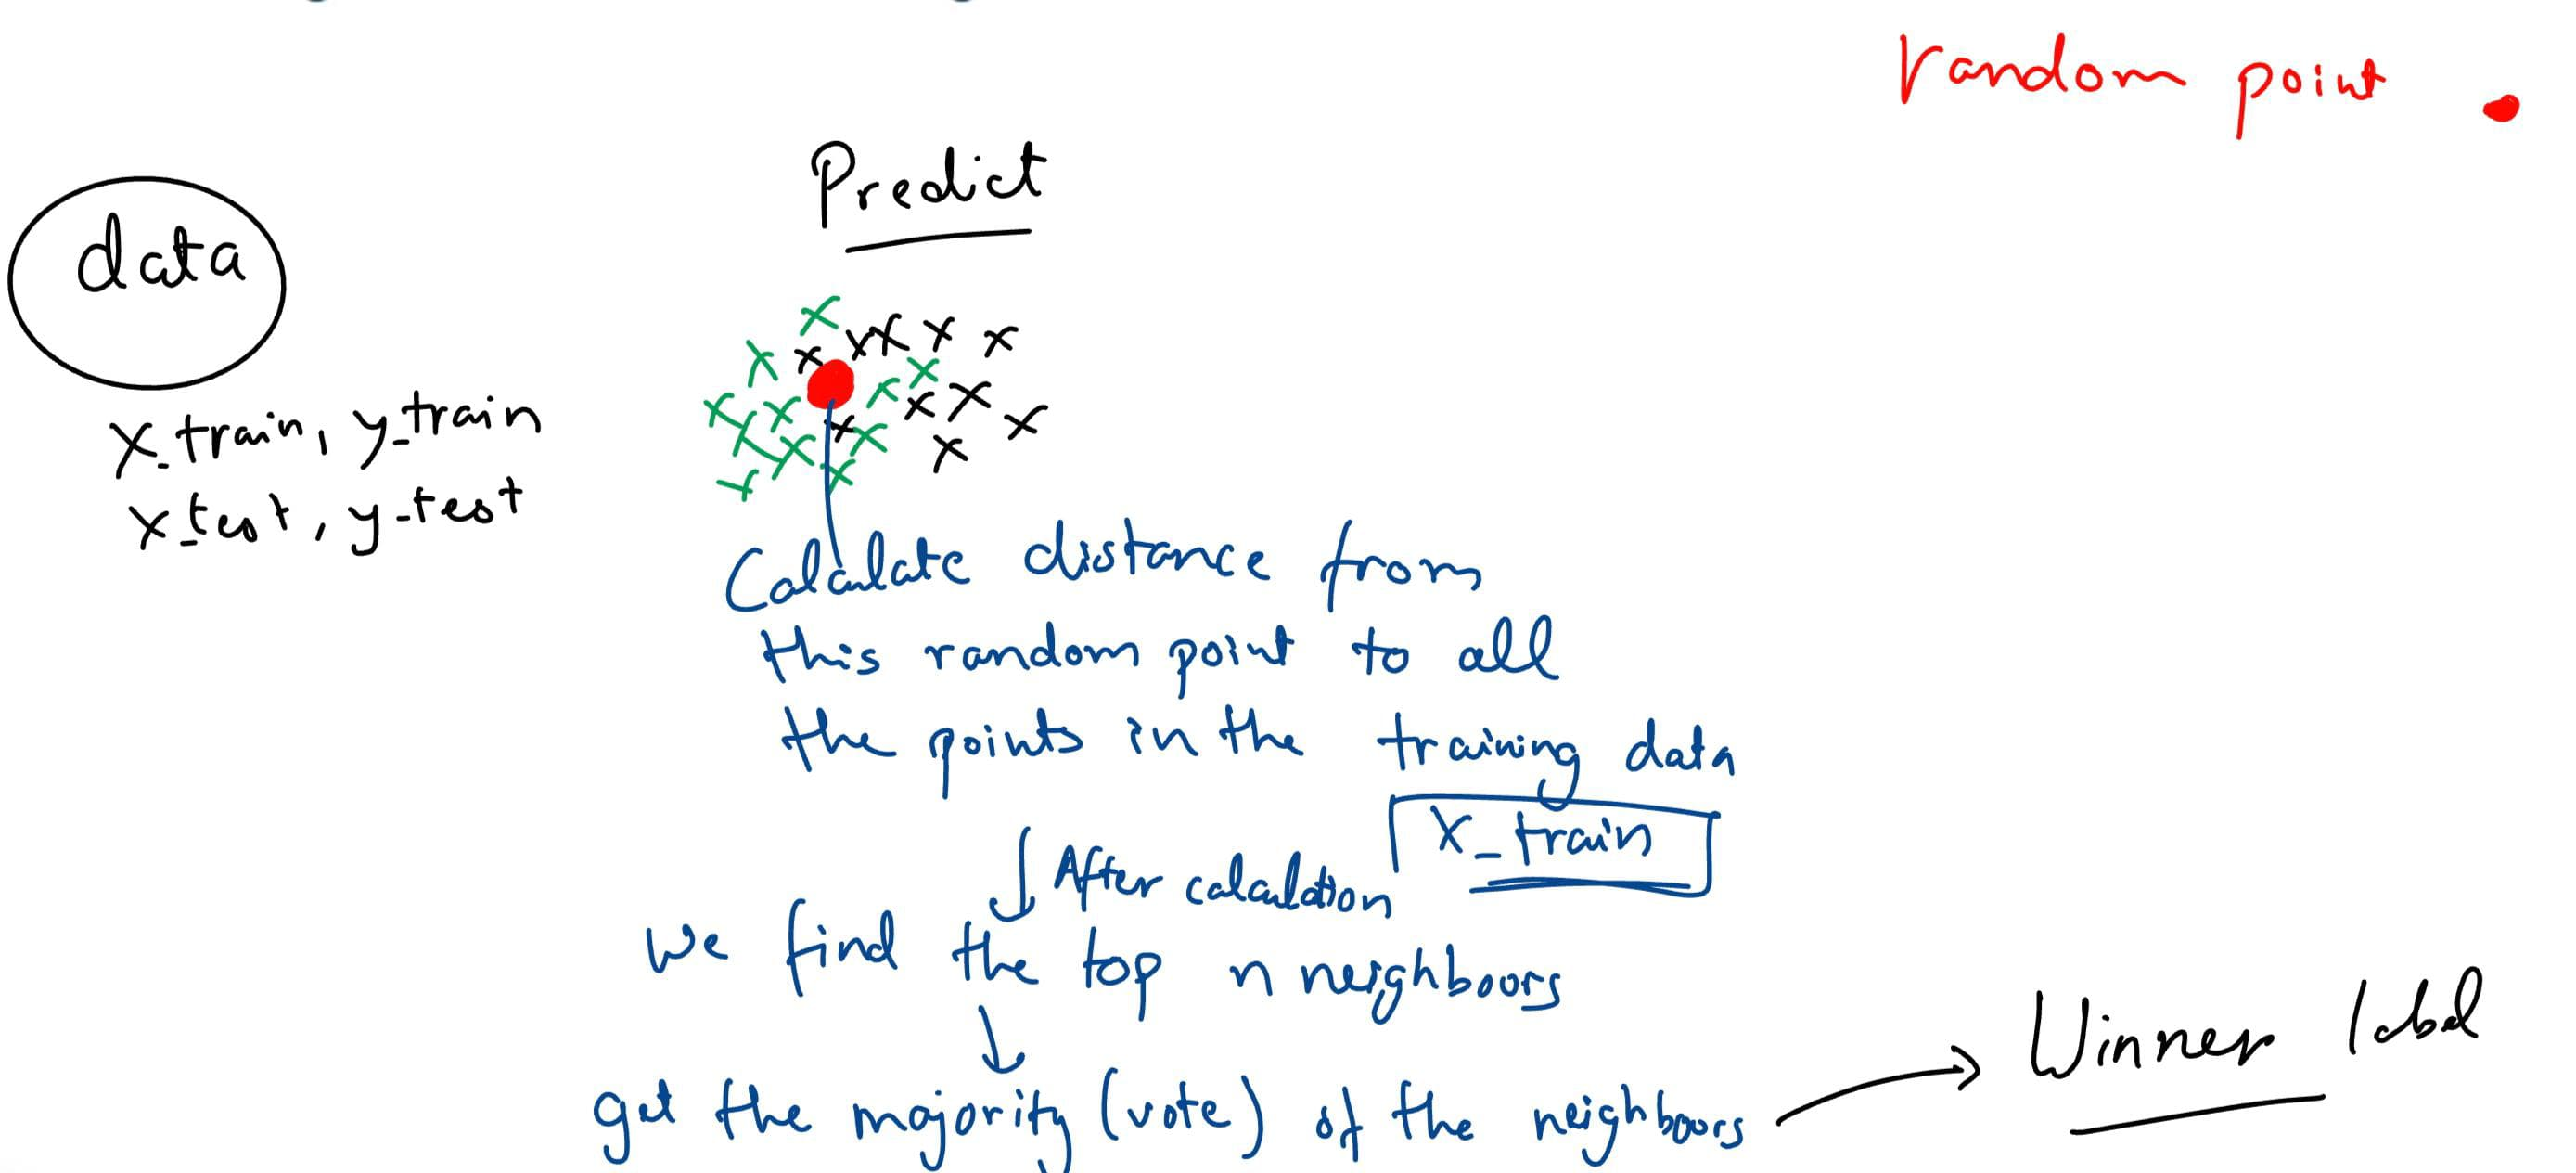

# Therefore, Our own KNN class has the same output.

Well commented code with ai

In [50]:
import numpy as np
import pandas as pd
from collections import Counter

class VrajKnn:

    def __init__(self, k):
        """
        Initialize the KNN classifier

        What happens here:
        - Store the number of neighbors (k) we want to consider
        - Set training data placeholders to None (we'll fill these in train())

        Example: VrajKnn(k=3) means we'll look at 3 nearest neighbors
        """
        self.n_neighbors = k          # Store k value (e.g., k=3)
        self.X_train = None          # Will store training features later
        self.y_train = None          # Will store training labels later

    def train(self, X_train, y_train):
        """
        Store the training data (KNN is a "lazy learner")

        What happens here:
        - KNN doesn't actually "learn" anything during training
        - It just memorizes all the training data
        - Real work happens during prediction phase

        Example inputs:
        X_train = [[1,2], [3,4], [5,6], [7,8]]  # Feature points
        y_train = ['A', 'A', 'B', 'B']          # Corresponding labels
        """
        # Almost nothing happens in the training phase since KNN is a lazy learner,
        # meaning that KNN does it's main calculation in the Prediction phase.

        # Just store the training data for later use
        self.X_train = X_train       # Store all training points
        self.y_train = y_train       # Store all training labels

        # Convert to numpy arrays to avoid pandas indexing issues
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        """
        Predict labels for test points using KNN algorithm

        What happens here:
        1. For each test point, calculate distance to ALL training points
        2. Find the k nearest neighbors
        3. Take majority vote of their labels
        4. Return the winning label as prediction

        Example:
        X_test = [[2,3], [6,7]]  # Two test points to classify
        Returns: ['A', 'B']      # Predicted labels
        """
        y_pred = []  # List to store all predictions

        # OUTER LOOP: Process each test point one by one
        for i in X_test:  # i = current test point, e.g., [2,3]
            print(f"\n🎯 Classifying test point: {i}")

            # STEP 1: Calculate distance from test point to EVERY training point
            distances = []  # List to store all distances

            # INNER LOOP: Calculate distance to each training point
            for j in self.X_train:  # j = current training point, e.g., [1,2]
                dist = self.calculate_distance(i, j)  # Calculate Euclidean distance
                distances.append(dist)
                print(f"   Distance from {i} to {j}: {dist:.2f}")

            print(f"   All distances: {[round(d, 2) for d in distances]}")

            # STEP 2: Sort distances and get k nearest neighbors
            # enumerate(distances) creates: [(0, dist1), (1, dist2), (2, dist3), ...]
            # This keeps track of which training point each distance belongs to
            indexed_distances = list(enumerate(distances))
            print(f"   Indexed distances: {[(idx, round(dist, 2)) for idx, dist in indexed_distances]}")

            # Sort by distance (second element of each tuple) and take first k
            n_neighbors = sorted(indexed_distances, key=lambda x: x[1])[0:self.n_neighbors]
            print(f"   {self.n_neighbors} nearest neighbors: {[(idx, round(dist, 2)) for idx, dist in n_neighbors]}")

            # STEP 3: Get majority vote from k nearest neighbors
            label = self.majority_count(n_neighbors)
            print(f"   Predicted label: {label}")

            # Add prediction to results list
            y_pred.append(label)

        return np.array(y_pred)  # Convert to numpy array and return

    def calculate_distance(self, point_a, point_b):
        """
        Calculate Euclidean distance between two points

        What happens here:
        - Takes two points: point_a=[x1,y1], point_b=[x2,y2]
        - Calculates: sqrt((x1-x2)² + (y1-y2)²)
        - Returns single distance value

        Example:
        point_a = [2, 3]
        point_b = [5, 7]
        distance = sqrt((2-5)² + (3-7)²) = sqrt(9 + 16) = sqrt(25) = 5.0
        """
        # np.linalg.norm() calculates Euclidean distance
        # point_a - point_b gives difference vector, norm gives magnitude
        distance = np.linalg.norm(point_a - point_b)
        return distance

    def majority_count(self, neighbors):
        """
        Find the most common label among k nearest neighbors

        What happens here:
        1. Extract labels of the k nearest neighbors
        2. Count how many times each label appears
        3. Return the label that appears most frequently

        Example:
        neighbors = [(2, 1.4), (5, 2.1), (1, 2.8)]  # (index, distance) pairs
        If training labels are ['A', 'B', 'A', 'B', 'A', 'A']:
        - neighbors[2] has label 'A'
        - neighbors[5] has label 'A'
        - neighbors[1] has label 'B'
        Vote count: A=2, B=1 → Return 'A'
        """
        votes = []  # List to collect labels of nearest neighbors

        # Extract the label for each nearest neighbor
        for i in neighbors:  # i = (index, distance) tuple, e.g., (2, 1.4)
            neighbor_index = i[0]                    # Get index: 2
            neighbor_label = self.y_train[neighbor_index]  # Get label at index 2
            votes.append(neighbor_label)
            print(f"      Neighbor at index {neighbor_index}: label '{neighbor_label}'")

        print(f"      All votes: {votes}")

        # Count occurrences of each label
        vote_counts = Counter(votes)  # e.g., Counter({'A': 2, 'B': 1})
        print(f"      Vote counts: {dict(vote_counts)}")

        # Get the most common label (first element of most_common() result)
        most_common_label = vote_counts.most_common()[0][0]
        print(f"      Winner: '{most_common_label}'")

        return most_common_label